In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_excel('PCOS_data_without_infertility.xlsx')
df2= pd.read_csv('PCOS_infertility.csv')

In [3]:
df1.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.304017,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [4]:
df1.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [5]:
df2.head()

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26


In [6]:
# The files are divided into infertility and without-infertility patients. 
# We can combine them by patient file no and delete the  repeated features and change PCOS(Y/N) to Target.

In [7]:
#merging with and without fertility data
df = pd.merge(df1,df2, on='Patient File No.', suffixes={'',' wo_inf'},how='left')


In [8]:
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Sl. No wo_inf,PCOS (Y/N) wo_inf,I beta-HCG(mIU/mL) wo_inf,II beta-HCG(mIU/mL) wo_inf,AMH(ng/mL) wo_inf
0,1,1,0,28,44.6,152.0,19.304017,15,78,22,...,3,3,18.0,18.0,8.5,NaN,NaN,NaN,NaN,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,3,5,15.0,14.0,3.7,NaN,NaN,NaN,NaN,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,13,15,18.0,20.0,10.0,NaN,NaN,NaN,NaN,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,2,2,15.0,14.0,7.5,NaN,NaN,NaN,NaN,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,3,4,16.0,14.0,7.0,NaN,NaN,NaN,NaN,NaN


In [9]:
#Drop repeated features
df =df.drop(['Sl. No wo_inf', 'PCOS (Y/N) wo_inf', '  I   beta-HCG(mIU/mL) wo_inf','II    beta-HCG(mIU/mL) wo_inf','AMH(ng/mL) wo_inf'], axis=1)

#Change the title of the properties
df = df.rename(columns = {"PCOS (Y/N)":"Target"})

#Look at the merged data.
df.head() 

,Sl. No,Patient File No.,Target,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.304017,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [10]:
# dropping redundant columns
df.drop(['Sl. No', 'Patient File No.'],axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Target                  541 non-null    int64  
 1    Age (yrs)              541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   540 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of aborptions       541 non-null    int64  
 14    I   beta-HCG(mIU/mL)  541 non-null    fl

In [12]:
# here we have to columns that are numbers but are present as string. 
# we will convert these columns into an integer


df["AMH(ng/mL)"] = pd.to_numeric(df["AMH(ng/mL)"], errors='coerce')
df["II    beta-HCG(mIU/mL)"] = pd.to_numeric(df["II    beta-HCG(mIU/mL)"], errors='coerce')

In [13]:
# now we have all the numeric data
# df.info()

In [14]:
# Checking null values
df.isnull().sum()

Target                    0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    1
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                1
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           1
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

In [15]:
# fillimg the null values using median.
df['Marraige Status (Yrs)'].fillna(df['Marraige Status (Yrs)'].median(),inplace=True)
df['II    beta-HCG(mIU/mL)'].fillna(df['II    beta-HCG(mIU/mL)'].median(),inplace=True)
df['AMH(ng/mL)'].fillna(df['AMH(ng/mL)'].median(),inplace=True)
df['Fast food (Y/N)'].fillna(df['Fast food (Y/N)'].median(),inplace=True)

In [16]:
# df.isnull().sum()

# Visualising the data


In [17]:
# Numerical data
def num_data(col):
    plt.hist(df[col], bins=55)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"frequency distribution for {col}")
    plt.show()

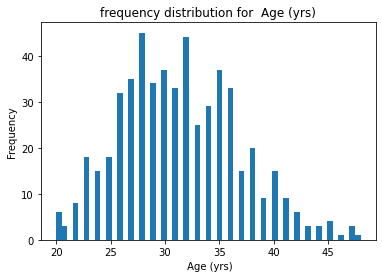

In [18]:
num_data(' Age (yrs)')

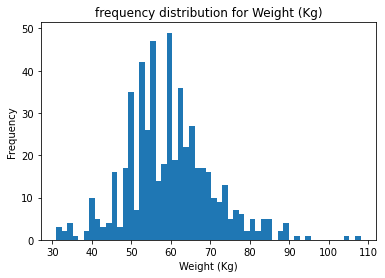

In [19]:
num_data('Weight (Kg)')

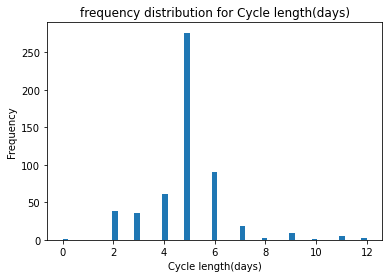

In [20]:
num_data('Cycle length(days)')

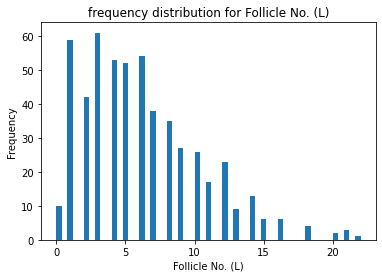

In [21]:
num_data('Follicle No. (L)')

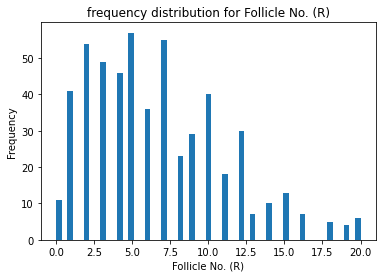

In [22]:
num_data('Follicle No. (R)')

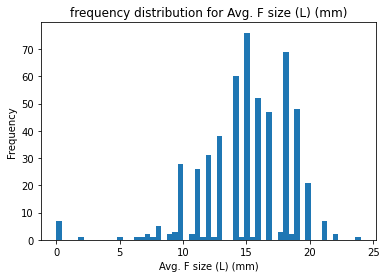

In [23]:
num_data('Avg. F size (L) (mm)')

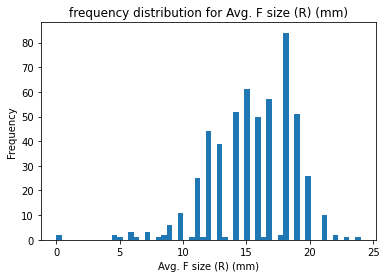

In [24]:
num_data('Avg. F size (R) (mm)')

In [25]:
(df['Target'].value_counts()/len(df['Target']))*100

0    67.28281
1    32.71719
Name: Target, dtype: float64

<AxesSubplot:xlabel='Target', ylabel='count'>

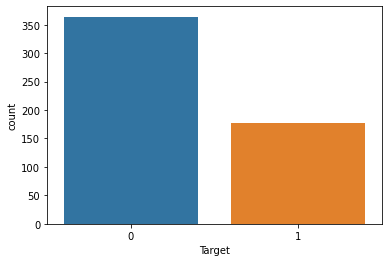

In [26]:
sns.countplot(df['Target'])

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

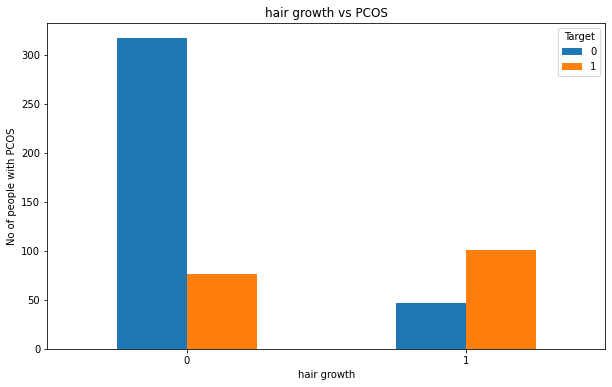

In [27]:

pd.crosstab(df['hair growth(Y/N)'],df['Target']).plot(kind="bar",figsize=(10,6))
plt.title("hair growth vs PCOS")
plt.xlabel("hair growth")
plt.ylabel("No of people with PCOS")
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

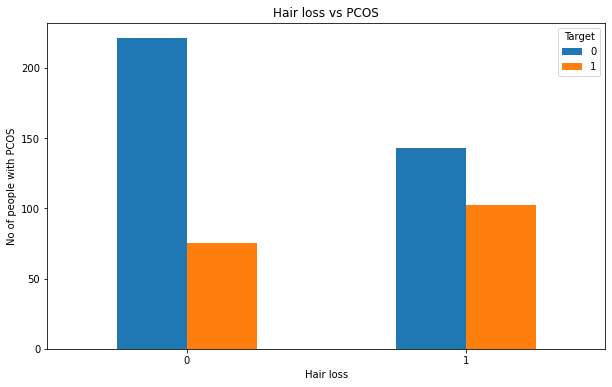

In [28]:


pd.crosstab(df['Hair loss(Y/N)'],df['Target']).plot(kind="bar",figsize=(10,6))
plt.title("Hair loss vs PCOS")
plt.xlabel("Hair loss")
plt.ylabel("No of people with PCOS")
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

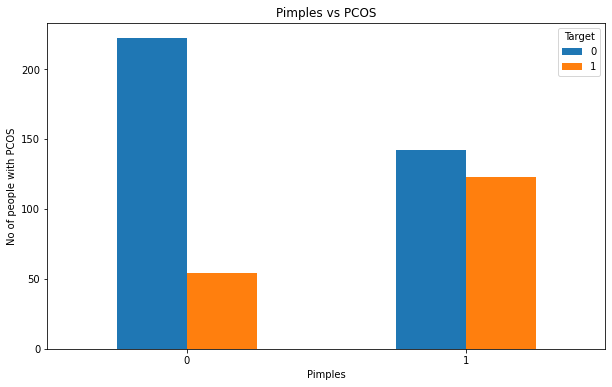

In [29]:


pd.crosstab(df['Pimples(Y/N)'],df['Target']).plot(kind="bar",figsize=(10,6))
plt.title("Pimples vs PCOS")
plt.xlabel("Pimples")
plt.ylabel("No of people with PCOS")
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

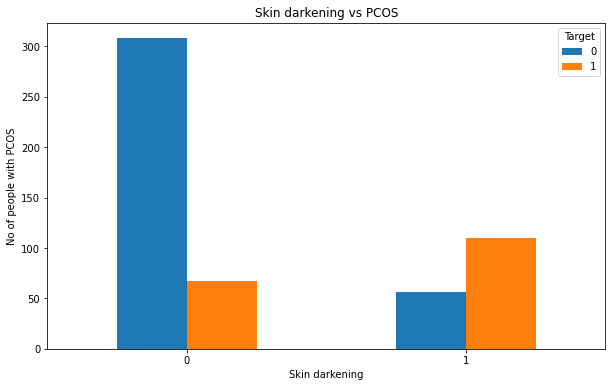

In [30]:


pd.crosstab(df['Skin darkening (Y/N)'],df['Target']).plot(kind="bar",figsize=(10,6))
plt.title("Skin darkening vs PCOS")
plt.xlabel("Skin darkening")
plt.ylabel("No of people with PCOS")
plt.xticks(rotation=0)

In [31]:
df.columns

Index(['Target', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI',
       'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
       'Pregnant(Y/N)', 'No. of aborptions', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [32]:
# df.corr()

<AxesSubplot:>

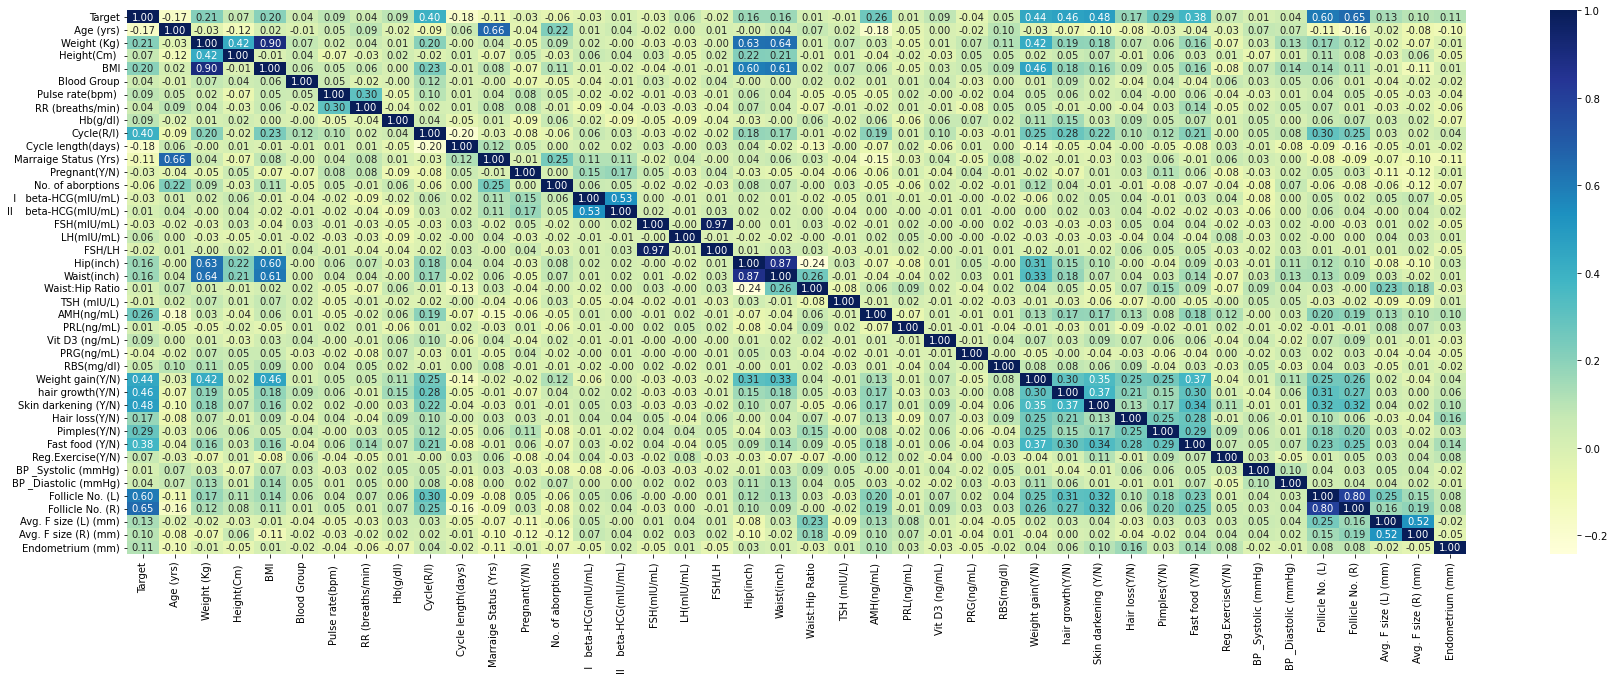

In [33]:
plt.subplots(figsize=(30,10))
sns.heatmap(df.corr(), cmap="YlGnBu", fmt = ".2f", annot=True)

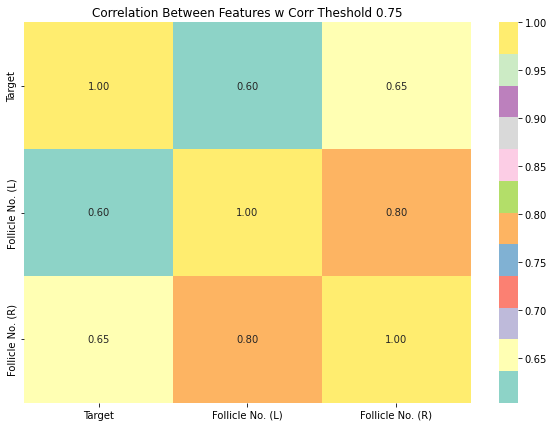

In [34]:
threshold = 0.5 
fil = np.abs(df.corr()["Target"]) > threshold 
corr_features = df.corr().columns[fil].tolist()
plt.subplots(figsize=(10,7))
sns.heatmap(df[corr_features].corr(),cmap="Set3", annot = True, fmt = ".2f")
plt.title("Correlation Between Features w Corr Theshold 0.75")
plt.show()

# train-test split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X=df.drop(labels = ["Target"],axis = 1)
y=df.Target

In [37]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=101) 

In [38]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(432, 41) (109, 41)
(432,) (109,)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.metrics import confusion_matrix, accuracy_score

# Logistic regression

In [40]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
acc_lr_train = round(LR.score(X_train, y_train)*100,2) 
acc_lr_test = round(LR.score(X_test,y_test)*100,2)
print(f"Training Accuracy: % {acc_lr_train}")
print(f"Testing Accuracy: % {acc_lr_test}")

Training Accuracy: % 87.27
Testing Accuracy: % 82.57


# Random Forest

In [41]:
RF= RandomForestClassifier()
RF.fit(X_train, y_train)
acc_rf_train = round(RF.score(X_train, y_train)*100,2) 
acc_rf_test = round(RF.score(X_test,y_test)*100,2)
print(f"Training Accuracy: % {acc_rf_train}")
print(f"Testing Accuracy: % {acc_rf_test}")

Training Accuracy: % 100.0
Testing Accuracy: % 89.91


# SVM

In [44]:
svm=SVC()
svm.fit(X_train, y_train)
acc_svm_train = round(svm.score(X_train, y_train)*100,2) 
acc_svm_test = round(svm.score(X_test,y_test)*100,2)
print(f"Training Accuracy: % {acc_svm_train}")
print(f"Testing Accuracy: % {acc_svm_test}")

Training Accuracy: % 67.59
Testing Accuracy: % 68.81


# Hyperparameter tuning

In [64]:
random_state = 101
classifier = [SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state)]


svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": ['auto', 'sqrt', 'log2'],
                "n_estimators":[200,400],
                "criterion":["gini"],
                'max_depth' : [4,5,6,7,9,10,12],}

lr_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}
                 
classifier_param = [svc_param_grid, rf_param_grid, lr_param_grid]

In [65]:
from sklearn.model_selection import  StratifiedKFold, GridSearchCV

cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(round(clf.best_score_*100,2))
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 28 candidates, totalling 280 fits
72.95
Fitting 10 folds for each of 42 candidates, totalling 420 fits
91.46
Fitting 10 folds for each of 14 candidates, totalling 140 fits
86.13


In [66]:
best_estimators

[SVC(C=1, gamma=0.001, random_state=101),
 RandomForestClassifier(max_depth=12, n_estimators=200, random_state=101),
 LogisticRegression(C=0.01, random_state=101)]

In [67]:
svm = best_estimators[0]
rf= best_estimators[1]
lr= best_estimators[2]


# XG Boost

In [42]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

[22:08:04] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:

acc_xgb_train = round(xgb.score(X_train, y_train)*100,2) 
acc_xgb_test = round(xgb.score(X_test,y_test)*100,2)
cv_result.append(acc_xgb_train)
print(f"Training Accuracy: % {acc_xgb_train}")
print(f"Testing Accuracy: % {acc_xgb_test}")

Training Accuracy: % 100.0
Testing Accuracy: % 88.07


In [72]:
model_list = ['SVC','RandomForest','Logistic Regression','XGBRF']

In [73]:
import plotly.graph_objects as go
# create trace1
trace1 = go.Bar(
                x = model_list,
                y = cv_result,
                marker = dict(color = 'rgb(0, 128, 128)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(title = 'Accuracy of different Classifier Models' , xaxis = dict(title = 'Classifier Models'), yaxis = dict(title = '% of Accuracy'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

# Confusion matrix

In [86]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
model = [svm,rf,lr,xgb]
predictions = []

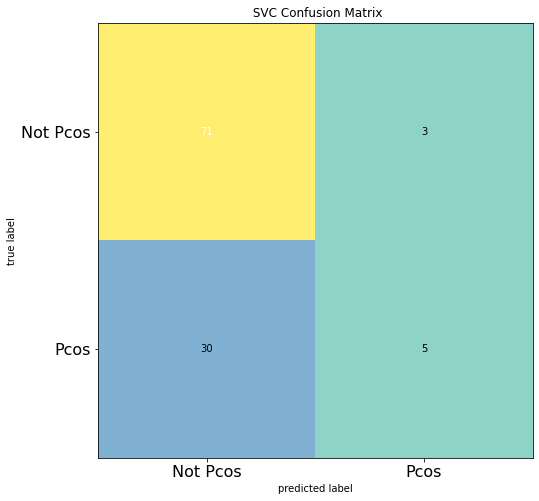

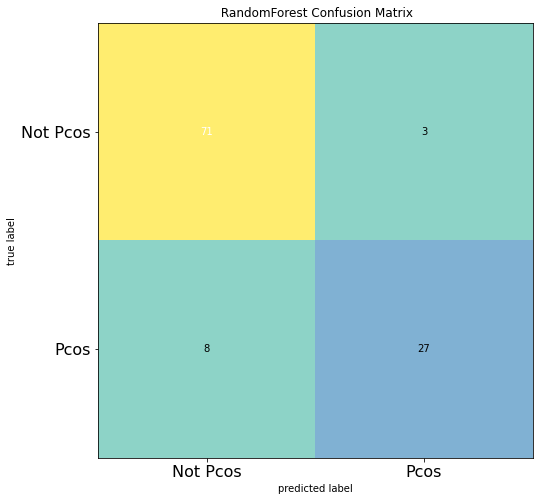

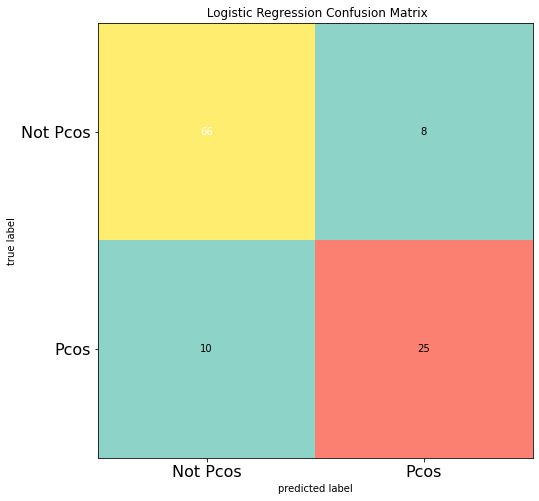

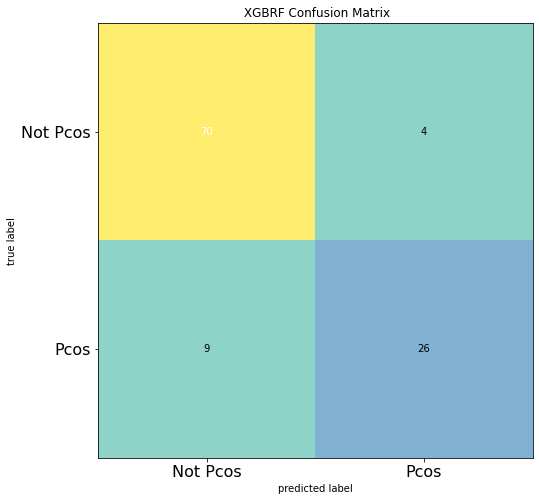

In [87]:
for i in model:
    predictions.append(i.predict(X_test))
for j in range(4):
    cm = confusion_matrix(y_test, predictions[j])
    plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Set3)
    plt.title(" {} Confusion Matrix".format(model_list[j]))
    plt.xticks(range(2), ["Not Pcos","Pcos"], fontsize=16)
    plt.yticks(range(2), ["Not Pcos","Pcos"], fontsize=16)
    plt.show()

In [85]:
import mlxtend